In [578]:
#load necessary library
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numpy import linalg
%matplotlib inline

In [579]:
#generate data 
with open('RedWine_HW7.txt','r') as f:
    features = []
    lines=f.readline()
    featues = lines.split(';')
    for i in range(13):
        features.append(featues[i]) 
r_data = np.genfromtxt('RedWine_HW7.txt',skip_header=1)
w_data = np.genfromtxt('WhiteWine_HW7.txt',skip_header=1)

<function matplotlib.pyplot.imshow>

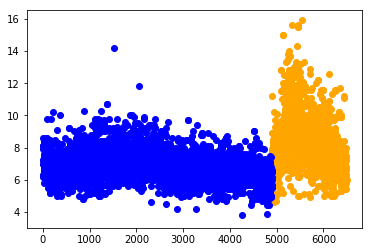

In [580]:
plt.figure
x1 = range(0,4898,1)
x2 = range(4898,4898+1599,1)
plt.scatter(x2,r_data[:,0],color='orange')
plt.scatter(x1,w_data[:,0],color='blue')
plt.imshow

In [581]:
# the first and second row storage the within group variance of each feature 
# the third row storage the between group variance of each feature
operator = np.zeros([3,13])
rdata = r_data
wdata = w_data
for i in range(13):
    # caculate the within group variance  c1=red wine   c2 = white wine
    c1 = np.cov(rdata[:,i])
    c2 = np.cov(wdata[:,i])
    #place the within variance into matrix
    operator[0,i] = c1
    operator[1,i] = c2
    #compute between variance of each feature of wine
    mu0 = (sum(rdata[:,i])+sum(wdata[:,i]))/(4898+1599)
    #print('mu0',mu0)
    s1 = 1599/(1599+4898)*(np.mean(rdata[:,i])-mu0)*(np.mean(rdata[:,i])-mu0)
    #print(np.mean(rdata[:,i]))
    s2 = 4898/(1599+4898)*(np.mean(wdata[:,i])-mu0)*(np.mean(wdata[:,i])-mu0)
    #print((np.mean(wdata[:,i])-mu0)*(np.mean(wdata[:,i])-mu0))
    Sb = s1 + s2
    #print(Sb)
    #storage s1 and s2 into operator
    operator[2,i] = Sb

In [582]:
#use FFS to select the best features
def FFS(covariance_matrix):
    dl = covariance_matrix
    best_list=[]
    dlist = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    cv = dl
    trace_ratio=[]
    ratio=[]
    for n in range(13):
        NumFeatures = n+1
        ratio.clear()
        for m in range(13-n):
            mum = sum(sum(cv[0,[best_list+[dlist[m]]]])+sum(cv[1,[best_list+[dlist[m]]]]))
            child = sum(sum(cv[2,[best_list+[dlist[m]]]]))
            ratio.append(child/mum)
        #print(ratio,n)
        BestValue = max(ratio)
        Position = ratio.index(BestValue)
        best_list.append(dlist[Position])
        np.delete(cv,dlist[Position],1)
        del dlist[Position]
        trace_ratio.append(BestValue)
    return trace_ratio,best_list


def BFS(covariance_matrix):
    dl = covariance_matrix
    cv = dl
    data_list = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    test_list = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    remove_list = []
    delta_ratio = []
    trace_ratio = []
    previous_ratio = sum(dl[2,:])/(sum(dl[0,:])+sum(dl[1,:]))
    for n in range(13):
        delta_ratio.clear()
        for i in range(13-n):
            if len(test_list)==1:
                return remove_list
            else:
                test_list = list(data_list)
                del test_list[i]
                #print(test_list)
                mum = sum(sum(cv[0,[test_list]])+sum(cv[1,[test_list]]))
                child = sum(cv[2,[test_list]].T)
                trace_ratio.append(child/mum)
                delta_ratio.append((child/mum)-previous_ratio)
            #print(child/mum)
        RemoveValue = min(delta_ratio)
        position = delta_ratio.index(RemoveValue)
        del data_list[position]
        previous_ratio = trace_ratio[position]
        remove_list.append(data_list[position])
    return remove_list

In [583]:
def fisher(A, B):
    group = np.zeros([13,3])
    for i in range(13):
        sum1 = 0
        Sw1 = np.cov(A[:,i])
        Sw2 = np.cov(B[:,i])
        group[i,0] = Sw1
        group[i,1] = Sw2
        mu = np.mean(np.hstack((A[:,i],B[:,i])))
        l = [len(A[:,i]),len(B[:,i])]
        for n in range(len(A[:,i])):
            sum1 = sum1 + A[n,i]
        mu1 = sum1/len(A[:,i])
        sb1 = len(A[:,i])/(1599+4898)*((mu1-mu)**2)
        sum2 = 0
        for n in range(len(B[:,i])):
            sum2 = sum2 + B[n,i]
        mu2 = sum2/len(B[:,i])
        sb2 = len(B[:,i])/(1599+4898)*((mu2-mu)**2)
        #print((mu2-mu)**2)
        Sb = sb1 + sb2
        #print(Sb)
        group[i,2] = Sb
    return group

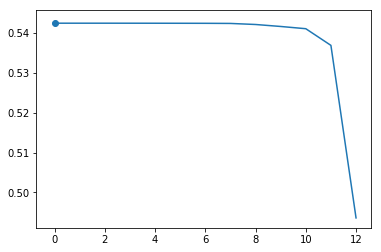

In [584]:
trace,best_list = FFS(operator)
plt.plot(trace)
plt.scatter(trace.index(max(trace)),max(trace))

In [585]:
remove_list = BFS(operator)
print(remove_list)

[7, 7, 4, 1, 2, 12, 10, 10, 4, 7, 12]


In [586]:
lists=[1,2,3,4,5,6]
lists.clear()

In [587]:
group = fisher(rdata,wdata)
print(group)
print(operator)

[[  3.03141639e+00   7.12113586e-01   3.98132460e-01]
 [  3.20623777e-02   1.01595410e-02   1.15573686e-02]
 [  3.79474831e-02   1.46457930e-02   7.41470915e-04]
 [  1.98789713e+00   2.57257702e+01   2.75392090e+00]
 [  2.21514265e-03   4.77333710e-04   3.22546624e-04]
 [  1.09414884e+02   2.89242720e+02   7.00694168e+01]
 [  1.08210237e+03   1.80608549e+03   1.56676945e+03]
 [  3.56202945e-06   8.94552419e-06   1.37200792e-06]
 [  2.38351805e-02   2.28011811e-02   2.80006095e-03]
 [  2.87326161e-02   1.30247060e-02   5.25557083e-03]
 [  1.13564740e+00   1.51442698e+00   1.54607373e-03]
 [  6.52168400e-01   7.84355685e-01   1.08559037e-02]
 [  8.41944025e-02   8.41344549e-02   7.74763572e-05]]
[[  3.03141639e+00   3.20623777e-02   3.79474831e-02   1.98789713e+00
    2.21514265e-03   1.09414884e+02   1.08210237e+03   3.56202945e-06
    2.38351805e-02   2.87326161e-02   1.13564740e+00   6.52168400e-01
    8.41944025e-02]
 [  7.12113586e-01   1.01595410e-02   1.46457930e-02   2.57257702e+

In [588]:
data = [1,2,3,4,5,6,7,8,9]
remove = [0,2,3,4,5]
data = remove
print(data)

[0, 2, 3, 4, 5]


In [589]:
for x in range(1,13):
    print(x)

1
2
3
4
5
6
7
8
9
10
11
12
